# Flight Price Prediction

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import pickle
import warnings
warnings.filterwarnings('ignore')

Importing All the necessary libraries.

# Reading and Understanding the Data

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Here we read the excel file of Train data in jupyter notebook.

In [3]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Here we read the excel file of Test data in jupyter notebook.

In [4]:
dftrain = pd.DataFrame(data=df_train)
dftrain.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


Here we are loading the Train dataset into DataFrame and displaying it's last five rows.

In [5]:
dftest = pd.DataFrame(data=df_test)
dftest.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


Here we are loading the Test dataset into DataFrame and displaying it's last five rows.

In [6]:
dftrain.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8726,Air India,15/06/2019,Delhi,Cochin,DEL → MAA → COK,06:05,09:25 16 Jun,27h 20m,1 stop,No info,7480
3889,Air India,24/05/2019,Mumbai,Hyderabad,BOM → HYD,15:00,16:25,1h 25m,non-stop,No info,3100
8477,Jet Airways,15/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,15:55,6h 10m,1 stop,In-flight meal not included,7280
6325,GoAir,6/03/2019,Delhi,Cochin,DEL → BOM → COK,10:25,19:20,8h 55m,1 stop,No info,8213
7172,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,16:10 13 Mar,17h 15m,1 stop,No info,13817
1888,Jet Airways,1/04/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,20:45 02 Apr,24h 45m,1 stop,In-flight meal not included,7064
6524,GoAir,3/05/2019,Banglore,Delhi,BLR → DEL,20:55,23:40,2h 45m,non-stop,No info,4239
5296,Jet Airways,1/04/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,16:20 02 Apr,21h 25m,1 stop,In-flight meal not included,7064
6806,Multiple carriers,9/06/2019,Delhi,Cochin,DEL → BOM → COK,10:00,01:30 10 Jun,15h 30m,1 stop,No info,7198
6377,Air India,1/05/2019,Kolkata,Banglore,CCU → DEL → COK → BLR,10:00,13:45 02 May,27h 45m,2 stops,No info,15164


Displaying 10 random samples of Train data to understand it more.

In [7]:
dftest.sample(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
1590,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,13:10,16:10,3h,non-stop,No info
1863,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,06:40,19:00,12h 20m,1 stop,No info
121,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,10:25 13 Mar,11h 30m,1 stop,In-flight meal not included
2485,Jet Airways,3/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,In-flight meal not included
1165,IndiGo,15/05/2019,Banglore,Delhi,BLR → DEL,16:55,19:55,3h,non-stop,No info
81,Vistara,9/06/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,09:05 10 Jun,16h 5m,1 stop,No info
1620,Air India,24/03/2019,Kolkata,Banglore,CCU → BOM → BLR,09:25,11:10 25 Mar,25h 45m,1 stop,No info
1332,Air India,21/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:45,19:15 22 May,23h 30m,2 stops,No info
568,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,15:15,01:30 28 May,10h 15m,1 stop,No info
1895,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:30 04 Jun,6h 30m,1 stop,No info


Displaying 10 random samples of Test data to understand it more.

# Data Inspection

In [8]:
dftrain.shape

(10683, 11)

There are 10683 rows and 11 columns in Train dataset.

In [9]:
dftest.shape

(2671, 10)

There are 2671 rows and 10 columns in the test dataset. 

In [10]:
dftrain.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All the feature columns in Train dataset are of Object datatype and the target variable , "Price" is of integer datatype.

In [11]:
dftest.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

Test dataset only contains of the feature variables and the datatype of all feature variables is 'Object'.

In [12]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


It gives us the column names with their total non-null count , datatype and memory usage of Train dataset.

In [13]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


It gives us the column names with their total non-null count , datatype and memory usage of Test dataset.

In [14]:
dftrain.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

It gives us the names of all columns present in the Train Dataset.

Here Price is the target variable.

In [15]:
dftest.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

It gives us the names of all columns present in the Test Dataset.

About Columns:
    
1. Airline : Name of the airline
2. Date_of_Journey : Date of travel
3. Source : City of Departure
4. Destination : City of Arrival
5. Route : Route of the journey (alongwith the Stops) 
6. Dep_Time: Time of Departure
7. Arrival_Time : Time of Arrival 
8. Duration : Total duration of the journey
9. Total_Stops : Number of stops in a journey
10. Additional_Info : Additional Information about the flight (If any)  

# Data Cleaning

In [16]:
#Checking for Null values
dftrain.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 1-1 missing values in column 'Route' and 'Total_Stops' of Train dataset.

In [17]:
#Checking for Null values
dftest.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There are no missing values in Test dataset.

In [18]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
dftrain['Route']=imp.fit_transform(dftrain['Route'].values.reshape(-1,1))
dftrain['Total_Stops']=imp.fit_transform(dftrain['Total_Stops'].values.reshape(-1,1))

We have treated the missing values of both the columns by using Simple Imputer Technique.

<AxesSubplot:>

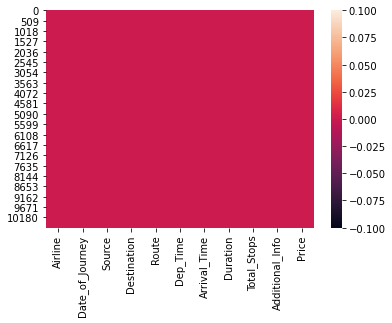

In [19]:
sn.heatmap(dftrain.isnull())

This is the visualization of having absolute no null values in the Train dataset.

<AxesSubplot:>

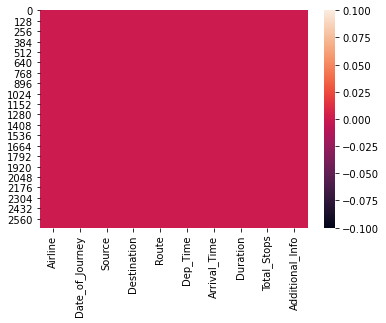

In [20]:
sn.heatmap(dftest.isnull())

This is the visualization of having absolute no null values in the Test dataset.

Since the feature variables in the dataset are of categorical type , we are not required to check for Outliers and Skewness.

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='Price', ylabel='Density'>

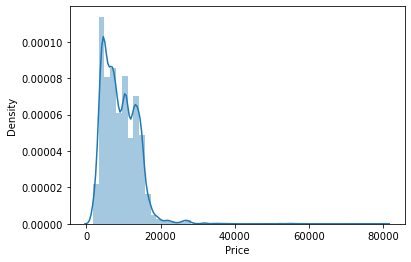

In [21]:
sn.distplot(dftrain['Price'])

The target variable, 'Price' is not distributed normally. It keeps changing based on the events and feature factors.

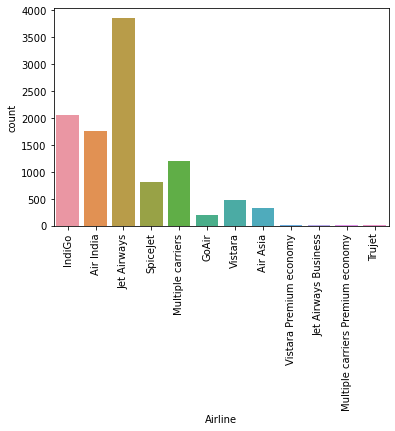

In [22]:
sn.countplot(dftrain['Airline'])
plt.xticks(rotation=90)
plt.show()

The maximum flights taken/available belongs to airline 'Jet Airways' followed by "IndiGo" and "Air India"

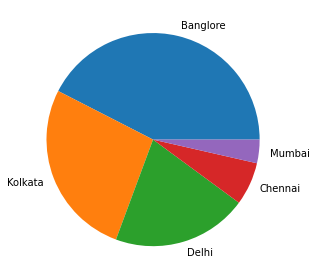

In [23]:
plt.pie(dftrain['Source'].value_counts(), labels=dftrain['Source'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Maximum flights take off from Banglore and Kolkata.

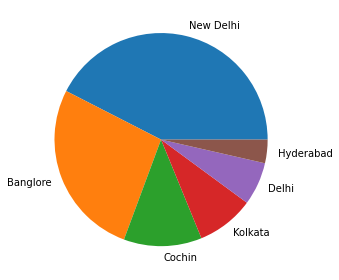

In [24]:
plt.pie(dftrain['Destination'].value_counts(), labels=dftrain['Destination'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Maximum passengers take a flight to New Delhi and Banglore.

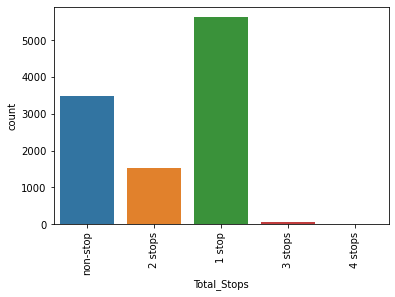

In [25]:
sn.countplot(dftrain['Total_Stops'])
plt.xticks(rotation=90)
plt.show()

Maximum flights are with 1 stop followed by non-stop flights.

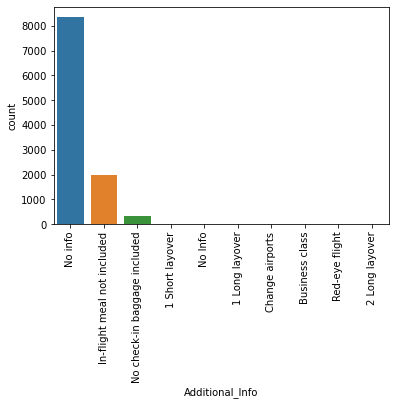

In [26]:
sn.countplot(dftrain['Additional_Info'])
plt.xticks(rotation=90)
plt.show()

There is no 'Additional_Info' for maximum flights.

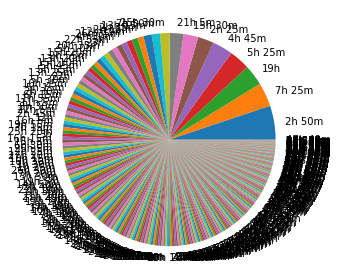

In [27]:
plt.pie(dftrain['Duration'].value_counts(), labels=dftrain['Duration'].unique(),shadow=False)
plt.tight_layout()
plt.show()

Since Date , Route , departure time , arrival time and duration have a wide number of unique values in it , hence we will not be performing their Univariate Analysis.

# Bivariate Analysis

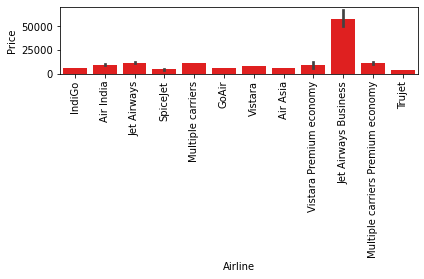

In [28]:
sn.barplot(x=dftrain['Airline'],y=dftrain['Price'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

The Maximum priced 'Airline' is Jet airways business

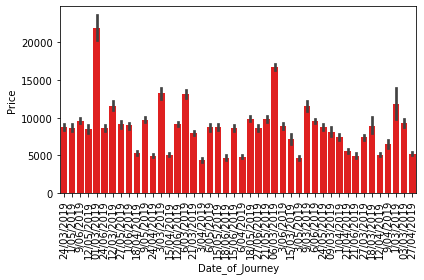

In [29]:
sn.barplot(x=dftrain['Date_of_Journey'],y=dftrain['Price'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

The highest flight price was on 01/03/2019 and 3/06/2019

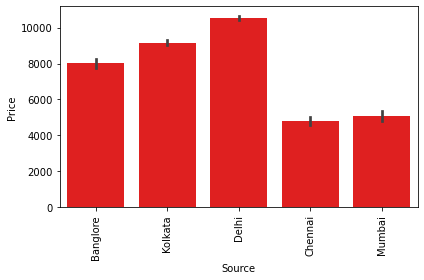

In [30]:
sn.barplot(x=dftrain['Source'],y=dftrain['Price'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

Flights from delhi have high prices

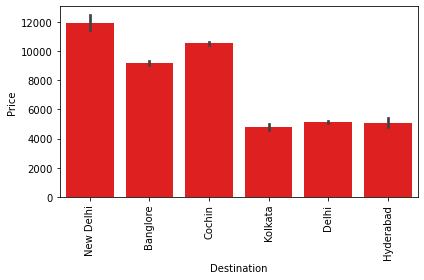

In [31]:
sn.barplot(x=dftrain['Destination'],y=dftrain['Price'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

Flights to New Delhi are also highly priced , followed by Cochin and Banglore.

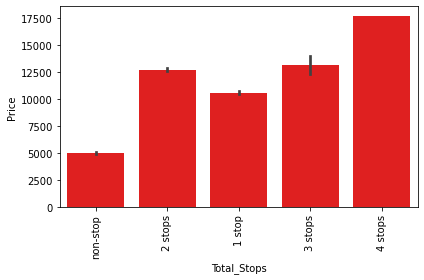

In [32]:
sn.barplot(x=dftrain['Total_Stops'],y=dftrain['Price'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

The 4 stop flights have the highest price . Or we can say that Number of total stops is directly proportional to the Price.

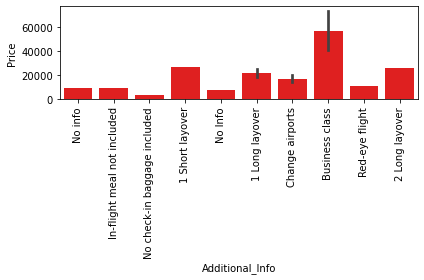

In [33]:
sn.barplot(x=dftrain['Additional_Info'],y=dftrain['Price'],color='red')
plt.xticks(rotation=90)
plt.tight_layout()

Business class has the highest price.

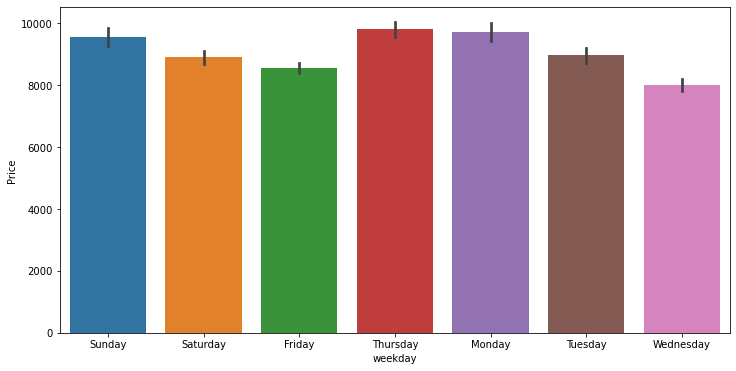

In [34]:
dftest['Date_of_Journey'] = pd.to_datetime(dftest['Date_of_Journey'])
dftrain['Date_of_Journey'] = pd.to_datetime(dftrain['Date_of_Journey'])
dftrain['weekday'] = dftrain['Date_of_Journey'].dt.day_name()
plt.figure(figsize=(12, 6))
sn.barplot(data=dftrain, x='weekday', y='Price')
plt.show()

The highest price of flight is on Thursday and Monday followed by Sunday

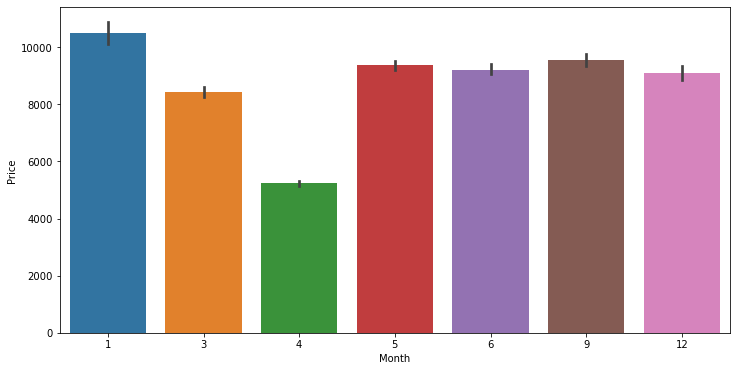

In [35]:
dftest['Month'] = dftest['Date_of_Journey'].dt.month
dftrain['Month'] = dftrain['Date_of_Journey'].dt.month
plt.figure(figsize=(12, 6))
sn.barplot(data=dftrain, x='Month', y='Price')
plt.show()

Describing the month with the price . Here 1st month (January) has highest flight price.

In [36]:
le=LabelEncoder()
cnt=0
for col in dftest :
    if dftest[col].dtype=='object':
        le.fit(dftest[col])
        dftest[col] = le.transform(dftest[col])
        cnt += 1

dftest['Date_of_Journey'] = le.fit_transform(dftest['Date_of_Journey'])

cont=0
for col in dftrain :
    if dftrain[col].dtype=='object':
        le.fit(dftrain[col])
        dftrain[col] = le.transform(dftrain[col])
        cont += 1

dftrain['Date_of_Journey'] = le.fit_transform(dftrain['Date_of_Journey'])
dftrain        

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,Month
0,3,11,0,5,18,211,233,240,4,8,3897,3,3
1,1,2,3,0,84,31,906,336,1,8,7662,2,1
2,4,35,2,1,118,70,413,106,1,8,13882,0,9
3,3,38,3,0,91,164,1324,311,0,8,6218,4,12
4,3,0,0,5,29,149,1237,303,0,8,13302,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,33,3,0,64,183,1259,236,4,8,4107,6,9
10679,1,17,3,0,64,193,1305,237,4,8,4145,2,4
10680,4,17,0,2,18,58,824,280,4,8,7229,2,4
10681,10,0,0,5,18,92,938,238,4,8,12648,4,1


We have encoded the feature variables using label encoder technique.

# Multivariate Analysis

<AxesSubplot:>

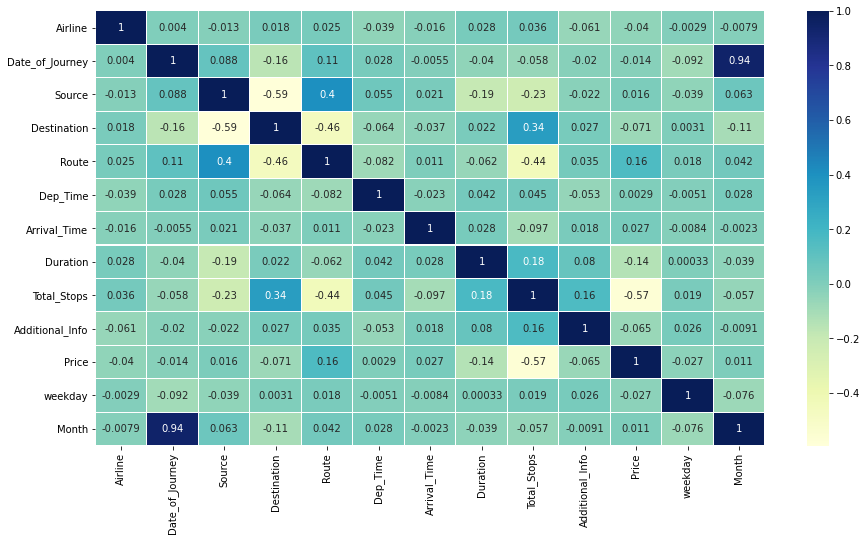

In [37]:
a=dftrain.corr()
plt.figure(figsize=(15,8))
sn.heatmap(a,linewidth=0.1, cmap="YlGnBu", annot = True)

There exist multicollinearity between 'Date_of_Journey' and 'Month'.

In [38]:
dftrain.drop(['Month'],axis=1,inplace=True)
dftest.drop(['Month'],axis=1,inplace=True)

Since 'Month' has least collinearity with the 'Price', we are dropping it from both the datasets.

# Model Building

In [39]:
x=dftrain.drop(['Price'],axis=1)
y=dftrain['Price']

Separatin feature and target variables into x and y respectively.

In [40]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
scale = StandardScaler()
x=scale.fit_transform(x)

Scaling and transforming the feature variables of train dataset.

In [41]:
dftest=power_transform(dftest,method='yeo-johnson')
scale = StandardScaler()
dftest=scale.fit_transform(dftest)

Scaling and transforming the test dataset.

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 5 )
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
lrpred=lr.predict(xtest)
print('r2_score of Linear Regression:',(r2_score(ytest,lrpred))*100,'%')

dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
dtrpredict=dtr.predict(xtest)
print('r2_score of DecisionTree Regressor:',(r2_score(ytest,dtrpredict))*100,'%')

knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
knrpredict=knr.predict(xtest)
print("r2_score of Kneighbors Regressor:",(r2_score(ytest,knrpredict))*100,'%')

svr = SVR()
svr.fit(xtrain,ytrain)
svrpredict=svr.predict(xtest)
print('r2_Score of SVR:',(r2_score(ytest,svrpredict))*100,'%')

sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
sgdpredict=sgd.predict(xtest)
print('r2_score of SGD Regressor:',(r2_score(ytest,sgdpredict))*100,'%')

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
rfrpredict=rfr.predict(xtest)
print('r2_score of RandomForestRegressor: ',(r2_score(ytest,rfrpredict))*100,'%')

r2_score of Linear Regression: 25.00503962991495 %
r2_score of DecisionTree Regressor: 82.6670147244863 %
r2_score of Kneighbors Regressor: 65.69634488653666 %
r2_Score of SVR: 0.28001632653781305 %
r2_score of SGD Regressor: 24.844884689344394 %
r2_score of RandomForestRegressor:  87.78512438459502 %


# Cross Validation Score

In [43]:
from sklearn.model_selection import cross_val_score as cvs
print('CVS of Linear Regression is',(cvs(lr,x,y,cv=5).mean())*100,'%')
print('CVS of DecisionTree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100,'%')
print('CVS of Kneighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100,'%')
print('CVS of SVR is',(cvs(svr,x,y,cv=5).mean())*100,'%')
print('CVS of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100,'%')
print('CVS of RandomForestRegressor is',(cvs(rfr,x,y,cv=5).mean())*100,'%')

CVS of Linear Regression is 25.812482854310897 %
CVS of DecisionTree Regressor is 78.96450467891607 %
CVS of Kneighbors Regressor is 69.05866806026599 %
CVS of SVR is 1.1501638362988897 %
CVS of SGD Regressor is 25.703243667346943 %
CVS of RandomForestRegressor is 87.53061678807403 %


# Hyper Parameter Tuning

In [44]:
parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}

gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Getting the best parameters for Final Model Building.

In [45]:
flight = RandomForestRegressor(bootstrap=True,min_samples_leaf=1,max_features='auto',min_samples_split=2)
flight.fit(xtrain,ytrain)
pred=flight.predict(xtest)
acc=r2_score(ytest,pred)
print('Accuracy for predicting temperature is', (acc*100),'%')

Accuracy for predicting temperature is 87.65056020056787 %


The accuracy of our final model is 87.98% which is good.

# Conclusion

In [47]:
a= np.array(ytest)
predicted = np.array(flight.predict(xtest))
fp=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
fp

,Original,Predicted
0,10844,10663.250
1,3383,3528.230
2,6795,9567.318
3,14714,16640.090
4,10676,10473.170
...,...,...
3200,3841,3845.260
3201,13376,13377.440
3202,3332,3737.590
3203,9899,9812.480


The predicted flight price using the best fit model is approximately equal (somewhere near) to the original flight price for almost 90% of the data.  

# Saving The Best Model

In [48]:
import pickle
filename = 'FlightPrice.pkl'
pickle.dump(flight,open(filename,'wb'))

Saving the Hyper Parameter Tuned RandomForestRegressor model.

# Prediction

In [49]:
load_model=pickle.load(open(filename,'rb'))
load_model.predict(dftest)

ValueError: X has 10 features, but DecisionTreeRegressor is expecting 11 features as input.

In [50]:
dftest

array([[ 0.12169898,  0.47883493, -0.02026559, ..., -1.8153342 ,
        -0.8917779 ,  0.4931055 ],
       [-0.32449908,  1.41089312,  0.88770502, ...,  0.83032423,
        -0.8917779 ,  0.4931055 ],
       [ 0.12169898, -0.01151197, -0.02026559, ..., -0.16276726,
        -0.8917779 , -2.05938963],
       ...,
       [ 0.12169898,  0.23614257, -0.02026559, ...,  1.11375454,
        -0.8917779 ,  0.4931055 ],
       [-1.41087141,  0.23614257, -0.02026559, ..., -1.14055087,
        -0.8917779 ,  0.4931055 ],
       [ 0.9055691 ,  0.55874426, -0.02026559, ..., -1.27591613,
        -0.8917779 ,  0.4931055 ]])

In [50]:
train_pred=flight.predict(dftest)
final_df=pd.DataFrame({ 'Price': train_pred })
final_df
#final_df.to_csv('final_dataset.csv',index=False)

ValueError: X has 10 features, but DecisionTreeRegressor is expecting 11 features as input.